# Final Model Evaluation on Unseen Test Data 

This notebook evaluates all the tuned models on the test dataset.

## 1. Import Libraries

In [1]:
import os
import sys
import joblib 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

### Import Supporting file

In [3]:
current_dir = os.path.abspath('')

project_root = os.path.dirname(current_dir)
if project_root not in sys.path:
    sys.path.append(project_root)
    
from scripts.model_utils import load_data

## 2. Load Data and Model

In [5]:
# Load the processed data
try:
    test_df= load_data('../data/processed/final_test_data.csv')
    print("Processed data loaded successfully.")
except FileNotFoundError:
    print("Error: '../data/processed/final_test_data.csv' not found.")
    print("Please ensure you have run the model_training script first.")

# Tuned models to evaluate
models_to_evaluate = {
    "Logistic Regression": "../models/tuned/logistic_regression.pkl",
    "KNN": "../models/tuned/knn.pkl",
    "SVM": "../models/tuned/svm.pkl",
    "Naive Bayes": "../models/tuned/naive_bayes.pkl",
    "Decision Tree": "../models/tuned/decision_tree.pkl",
    "Random Forest": "../models/tuned/random_forest.pkl",
    "Gradient Boosting": "../models/tuned/gradient_boosting.pkl",
    "XGBoost": "../models/tuned/xgboost.pkl"
}

Loading the data from ../data/processed/final_test_data.csv....
Processed data loaded successfully.


## 3. Prepare the Data

In [7]:
X_test= test_df.drop('target', axis=1)
y_test= test_df['target']

print(f"Test set feature shape: {X_test.shape}")
print(f"Test set target shape: {y_test.shape}")

Test set feature shape: (205, 13)
Test set target shape: (205,)


## 4. Evaluation And Prediction

### Logistic Regression Prediction


=== Evaluating Logistic Regression ===
Accuracy: 0.8732
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       100
           1       0.88      0.88      0.88       105

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



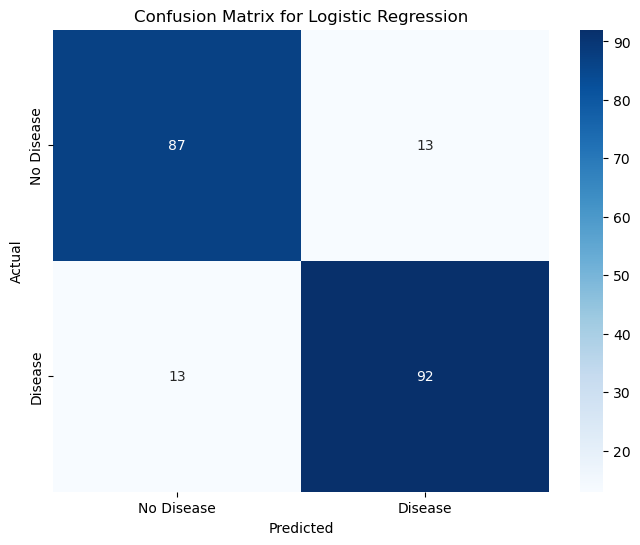

AUC Score: 0.9457


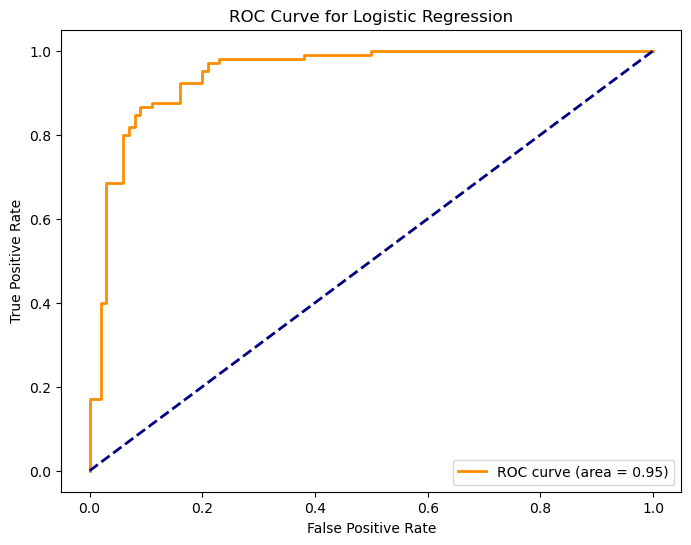

In [10]:
# Evaluating Logistic Regression
model_name = "Logistic Regression"
model_path = "../models/tuned/logistic_regression.pkl"

try:
    model = joblib.load(model_path)
    print(f"\n=== Evaluating {model_name} ===")
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Ploting Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Ploting ROC Curve
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        print(f"AUC Score: {roc_auc:.4f}")
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.title(f'ROC Curve for {model_name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()

except FileNotFoundError:
    print(f"Error: '{model_path}' not found. Skipping {model_name}.")

### K-Nearest Neighbors Prediction


=== Evaluating KNN ===
Accuracy: 0.9902
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       100
           1       1.00      0.98      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



C:\Users\praja\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\praja\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\praja\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\praja\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\praja\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

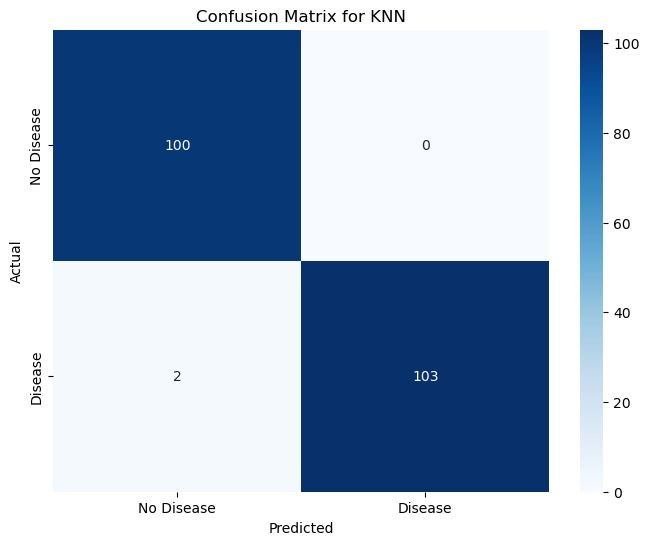

AUC Score: 0.9994


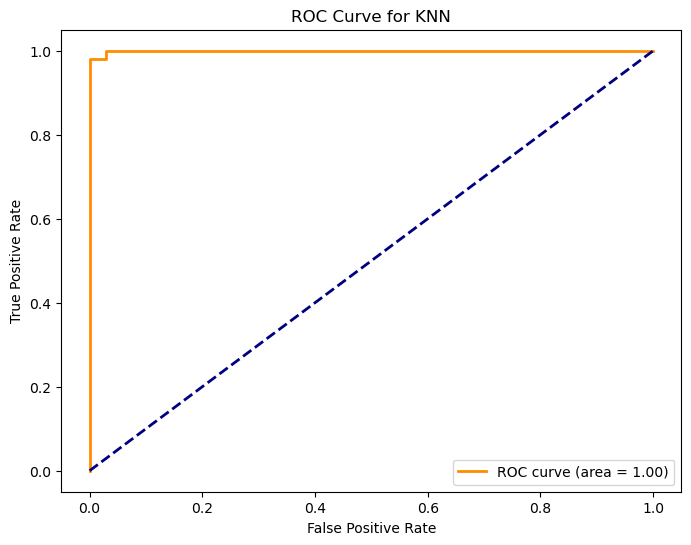

In [12]:
# Evaluating K-Nearest Neighbors
model_name = "KNN"
model_path = "../models/tuned/knn.pkl"

try:
    model = joblib.load(model_path)
    print(f"\n=== Evaluating {model_name} ===")
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plotting Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Plotting ROC Curve
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        print(f"AUC Score: {roc_auc:.4f}")
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.title(f'ROC Curve for {model_name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()

except FileNotFoundError:
    print(f"Error: '{model_path}' not found. Skipping {model_name}.")

### Support Vector Machine Prediction


=== Evaluating SVM ===
Accuracy: 0.9854
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



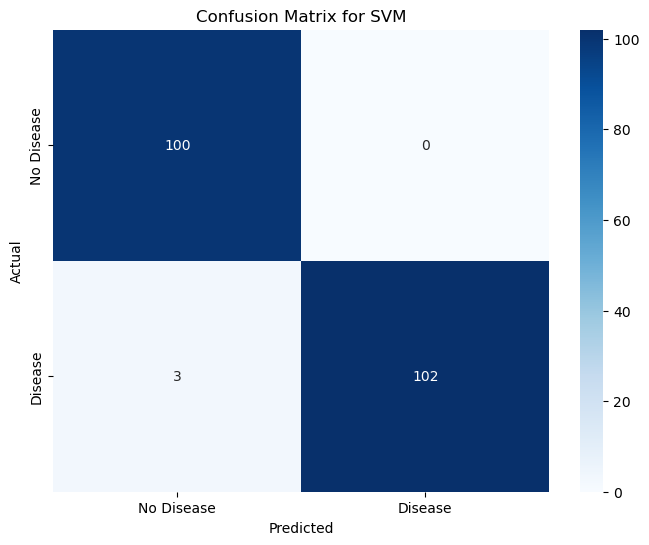

AUC Score: 0.9869


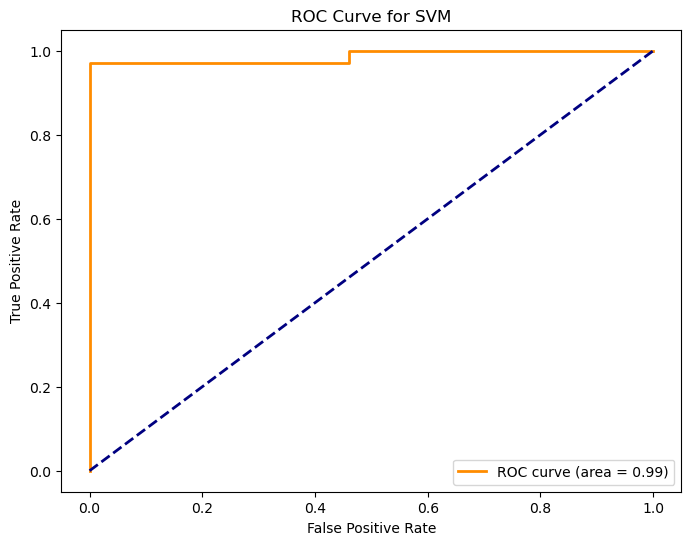

In [14]:
# Evaluating Support Vector Machine
model_name = "SVM"
model_path = "../models/tuned/svm.pkl"

try:
    model = joblib.load(model_path)
    print(f"\n=== Evaluating {model_name} ===")
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plotting Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Plotting ROC Curve
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        print(f"AUC Score: {roc_auc:.4f}")
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.title(f'ROC Curve for {model_name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()

except FileNotFoundError:
    print(f"Error: '{model_path}' not found. Skipping {model_name}.")

### Naive Bayes Prediction


=== Evaluating Naive Bayes ===
Accuracy: 0.8341
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       100
           1       0.83      0.85      0.84       105

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



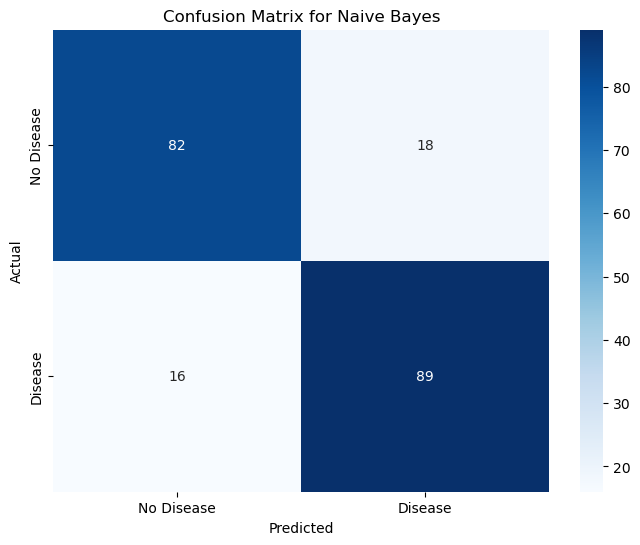

AUC Score: 0.9257


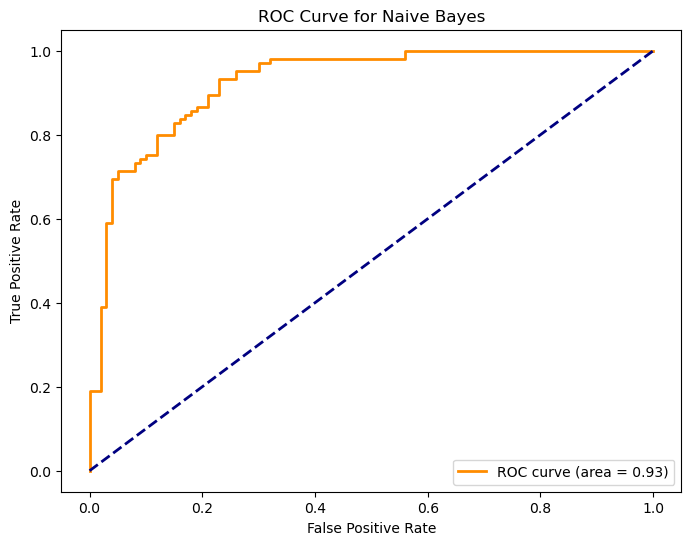

In [16]:
# Evaluating Naive Bayes
model_name = "Naive Bayes"
model_path = "../models/tuned/naive_bayes.pkl"

try:
    model = joblib.load(model_path)
    print(f"\n=== Evaluating {model_name} ===")
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plotting Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Plotting ROC Curve
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        print(f"AUC Score: {roc_auc:.4f}")
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.title(f'ROC Curve for {model_name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()

except FileNotFoundError:
    print(f"Error: '{model_path}' not found. Skipping {model_name}.")

### Decision Tree Prediction


=== Evaluating Decision Tree ===
Accuracy: 0.9561
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       100
           1       0.94      0.97      0.96       105

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



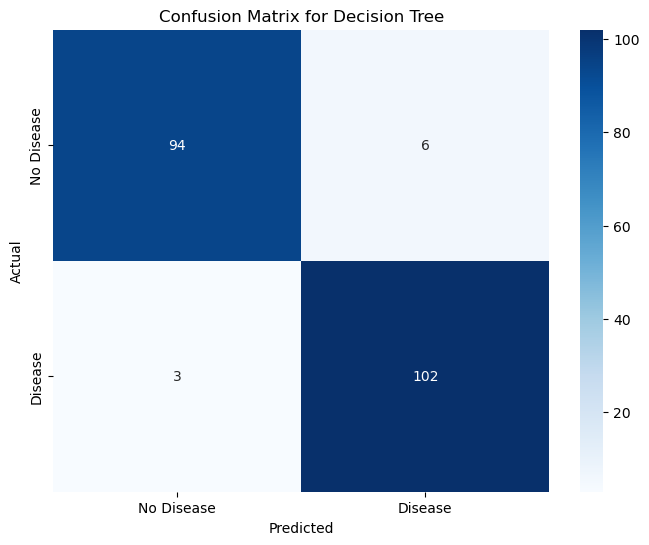

AUC Score: 0.9557


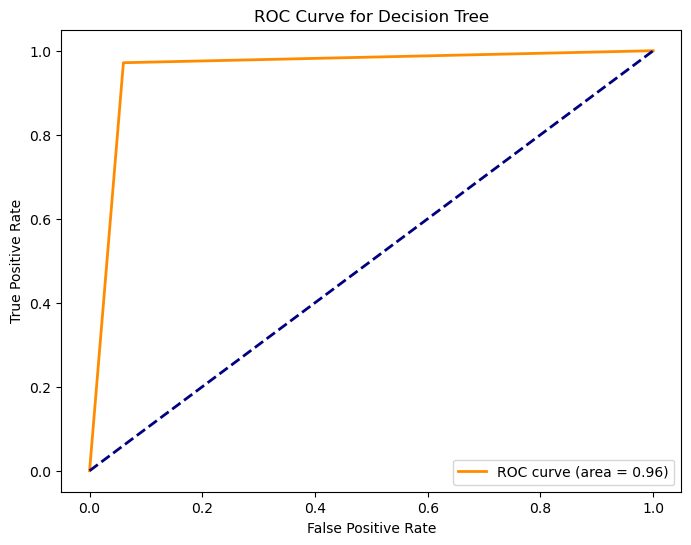

In [18]:
# Evaluating Decision Tree
model_name = "Decision Tree"
model_path = "../models/tuned/decision_tree.pkl"

try:
    model = joblib.load(model_path)
    print(f"\n=== Evaluating {model_name} ===")
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plotting Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Plotting ROC Curve
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        print(f"AUC Score: {roc_auc:.4f}")
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.title(f'ROC Curve for {model_name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()

except FileNotFoundError:
    print(f"Error: '{model_path}' not found. Skipping {model_name}.")

### Random Forest Prediction


=== Evaluating Random Forest ===
Accuracy: 0.9902
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       100
           1       1.00      0.98      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



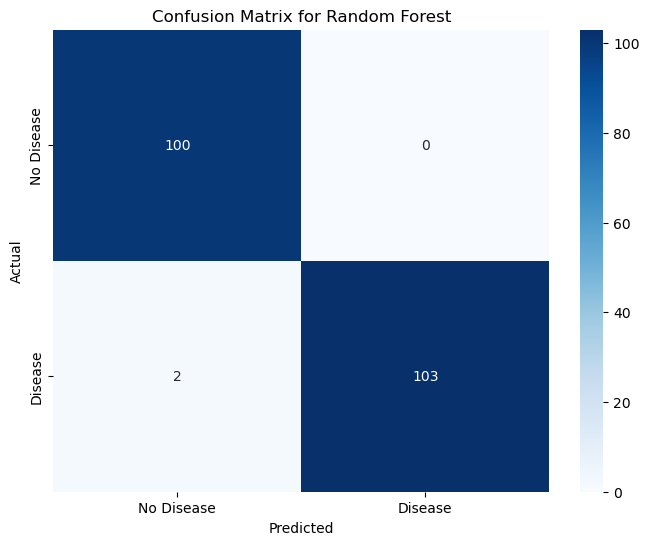

AUC Score: 0.9989


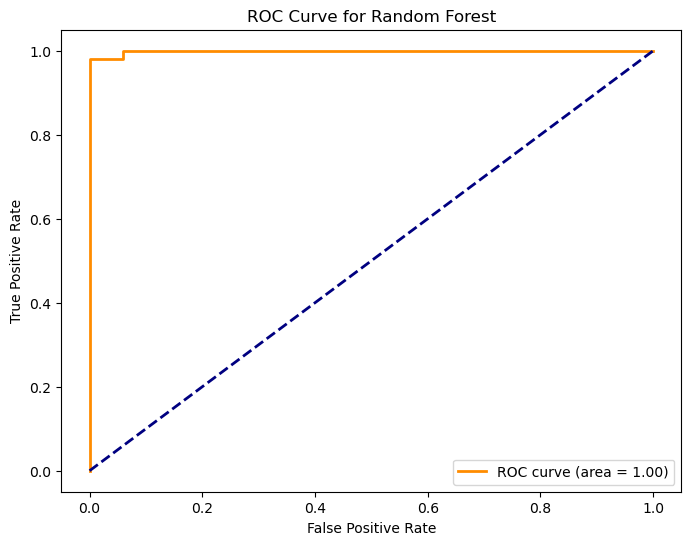

In [20]:
# Evaluating Random Forest
model_name = "Random Forest"
model_path = "../models/tuned/random_forest.pkl"

try:
    model = joblib.load(model_path)
    print(f"\n=== Evaluating {model_name} ===")
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plotting Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Plotting ROC Curve
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        print(f"AUC Score: {roc_auc:.4f}")
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.title(f'ROC Curve for {model_name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()

except FileNotFoundError:
    print(f"Error: '{model_path}' not found. Skipping {model_name}.")

### Gradient Boosting Prediction


=== Evaluating Gradient Boosting ===
Accuracy: 0.9756
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       100
           1       0.97      0.98      0.98       105

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



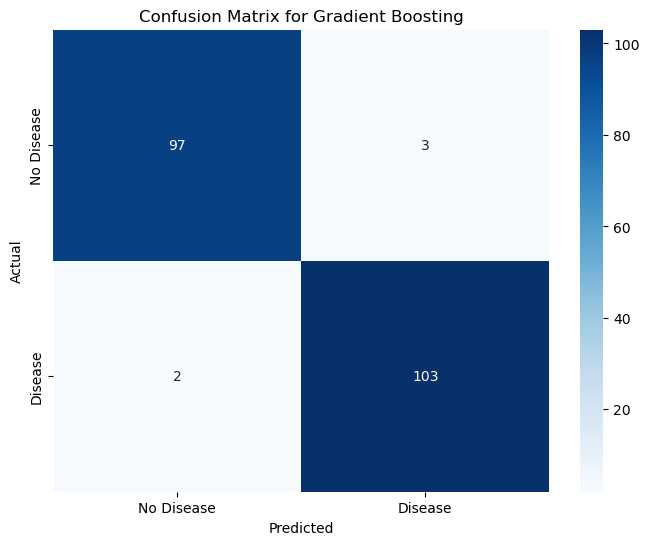

AUC Score: 0.9957


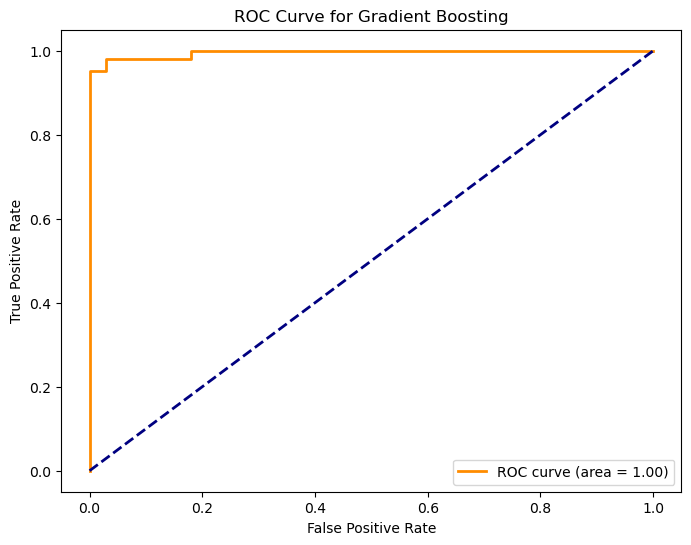

In [22]:
# Evaluating Gradient Boosting
model_name = "Gradient Boosting"
model_path = "../models/tuned/gradient_boosting.pkl"

try:
    model = joblib.load(model_path)
    print(f"\n=== Evaluating {model_name} ===")
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plotting Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Plotting ROC Curve
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        print(f"AUC Score: {roc_auc:.4f}")
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.title(f'ROC Curve for {model_name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()

except FileNotFoundError:
    print(f"Error: '{model_path}' not found. Skipping {model_name}.")

### XGBoost Prediction


=== Evaluating XGBoost ===
Accuracy: 0.9805
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       100
           1       0.98      0.98      0.98       105

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



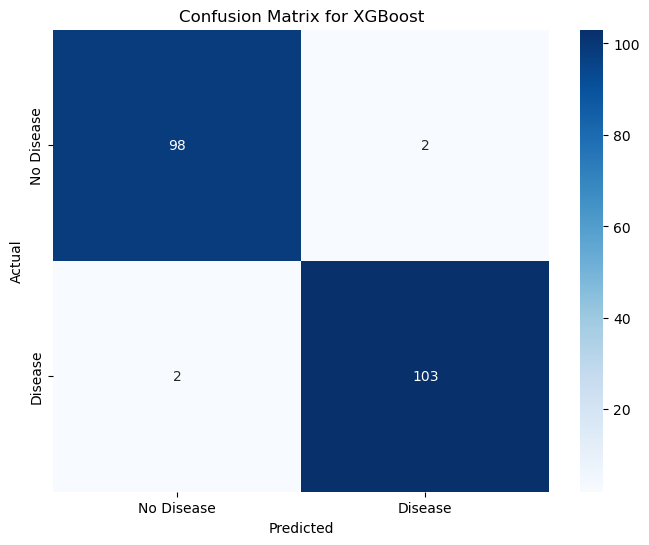

AUC Score: 0.9996


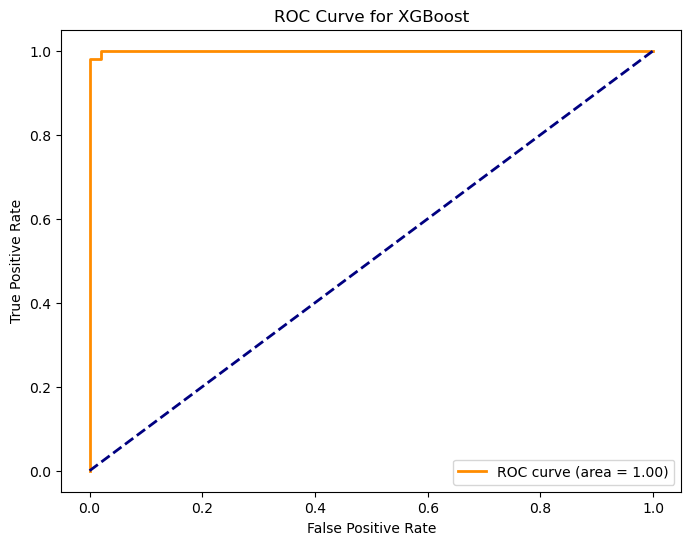

In [24]:
# Evaluating XGBoost
model_name = "XGBoost"
model_path = "../models/tuned/xgboost.pkl"

try:
    model = joblib.load(model_path)
    print(f"\n=== Evaluating {model_name} ===")
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plotting Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Plotting ROC Curve
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        print(f"AUC Score: {roc_auc:.4f}")
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.title(f'ROC Curve for {model_name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()

except FileNotFoundError:
    print(f"Error: '{model_path}' not found. Skipping {model_name}.")

## 5. Conclusion

* The evaluation of your hyper-tuned models on the unseen test data shows that three models stand out as top performers: K-Nearest Neighbors (KNN), Random Forest, and XGBoost.

* KNN and Random Forest are tied for the highest Accuracy at 0.9902. This means they correctly predicted the heart disease status for 99% of the unseen cases.

* XGBoost achieved the highest AUC Score at 0.9996, which indicates it has the best ability to distinguish between positive and negative classes. KNN's AUC score of 0.9994 is a very close second.

* Overall Reliability: Both KNN and Random Forest are the most reliable choices for your project due to their high accuracy and strong performance across all metrics. The consistent performance of these ensemble and tree-based models on truly unseen data validates their effectiveness for a real-world prediction pipeline.